# Iterative Shrinkage/Thresholding (IST) algorithms

In [93]:
# Wensheng Sun
# Reference: Sergios' Machine Learning book, 10.2.2

In [96]:
import numpy as np

class IST(object):
    """Iterative Shrinkage/Thresholding class"""
    def __init__(self,mu=1,c=.1,N_max=100,err_tol=0.0001,k0=3):
        self.mu = mu # learnign rate 
        self.c=c # lambda : const for l1 regularization weight
        self.N_max=N_max # maximum number of iterations
        self.err_tol=err_tol # error tolerance
        self.alpha = self.c*self.mu # soft thresholding 
        self.k0 = k0 # assume k0 sparse
        
    def estimate(self,X,y):
        
        N,L = X.shape # N: number of samples, L: unknown parameter dimensionality
        theta=np.zeros(L)
        err=y
        ii = 0
        
        while ii < self.N_max and np.linalg.norm(err) > self.err_tol:
            theta_tmp = theta + self.mu*X.T.dot(err)
            theta = self.hard_thresholding(theta_tmp)
            err = y-X.dot(theta)
            #print(theta)
            ii+=1
        self.n_iter=ii
        self.err=err
        self.theta=theta
        return self
    
    def hard_thresholding(self,x):
        ind = np.argpartition(x,-self.k0)[-self.k0:]
        x_tmp = np.zeros(x.shape)
        x_tmp[ind]=x[ind]
        return x_tmp
            
    def soft_thresholding(self,x):
        signs=np.sign(x)
        x_tmp=abs(x)-self.alpha # abs-threshold
        x_tmp[x_tmp<0] = 0 # force zeros for negative entries
        res=signs*x_tmp
        res[res<=0] =0
        return res

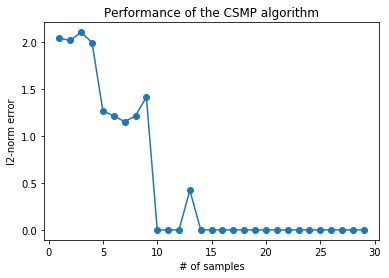

In [97]:
def main():
    
    L = 20 # dimension of the unknown vector w 
    k0 = 3 # assume w is k0-sparse
    w = np.zeros(L)
    rgn = np.random.RandomState(0)
    N_max =30 # max number of sensing samples
   
    # randomly choose k0 entries, and randomly assign values
    w[rgn.randint(0,L,k0)] = rgn.normal(loc=0.0,scale=1.0,size=k0)

    ist = IST(err_tol=0.001,mu=0.03,c=7,k0=k0)
    errors = [] # trace the errors 
    start=1
    #N=15
    for N in range(start,N_max):
        X = rgn.normal(loc=0.0,scale=1.0,size=(N,L))
        y = X.dot(w)
        ist.estimate(X,y)
        w_hat = ist.theta
        errors.append(np.linalg.norm(w-w_hat))
    #print(errors)
    #print(w_hat)
        
    # visualize the errors
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(np.arange(start,N_max), errors,marker='o')
    plt.ylabel('l2-norm error')
    plt.xlabel('# of samples')
    plt.title('Performance of the CSMP algorithm')
    plt.show()


if __name__=='__main__':
    main()